In [ ]:
!apt-get install -y tesseract-ocr
!pip install pytesseract pdf2image matplotlib openai==0.28


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import pytesseract
from pdf2image import convert_from_path
import openai
import matplotlib.pyplot as plt
from PIL import Image
import os

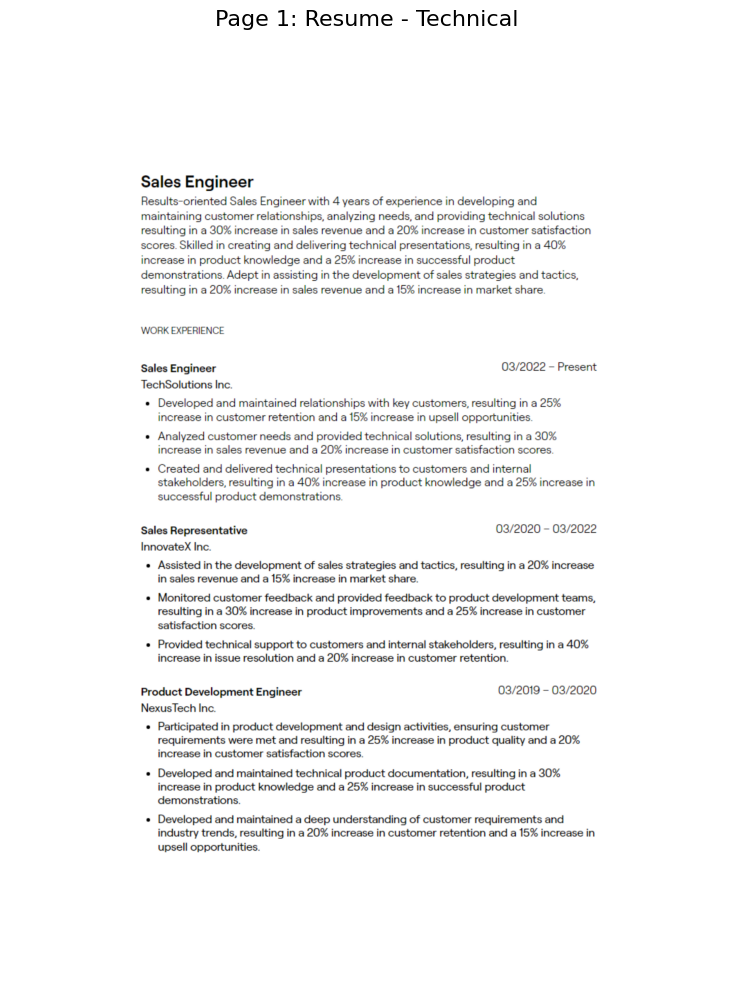

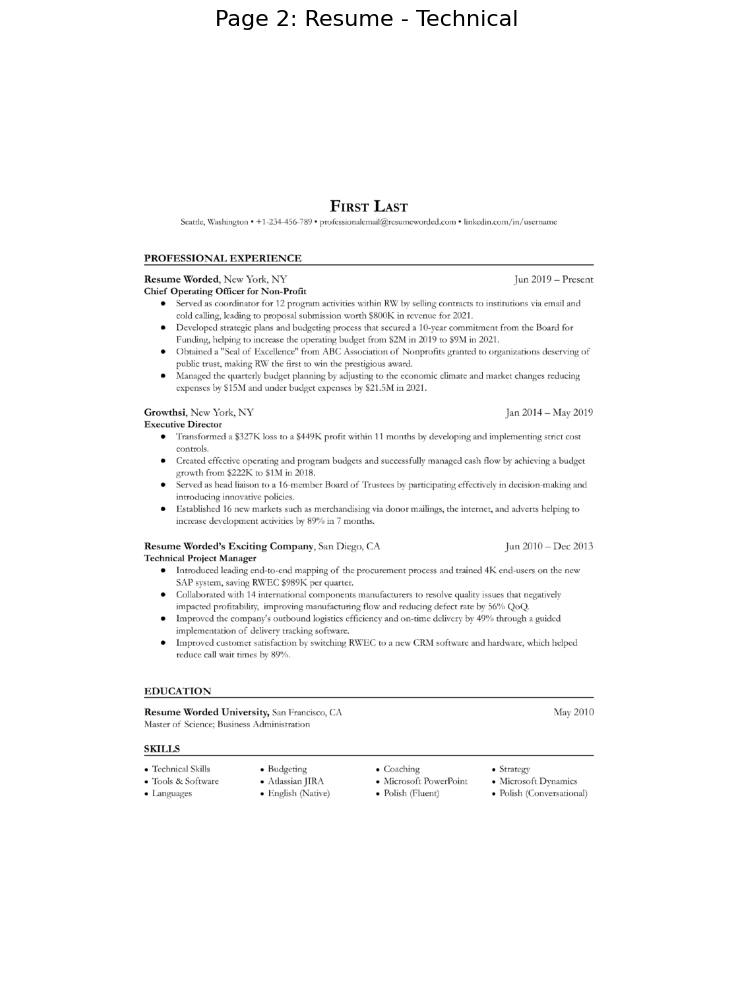

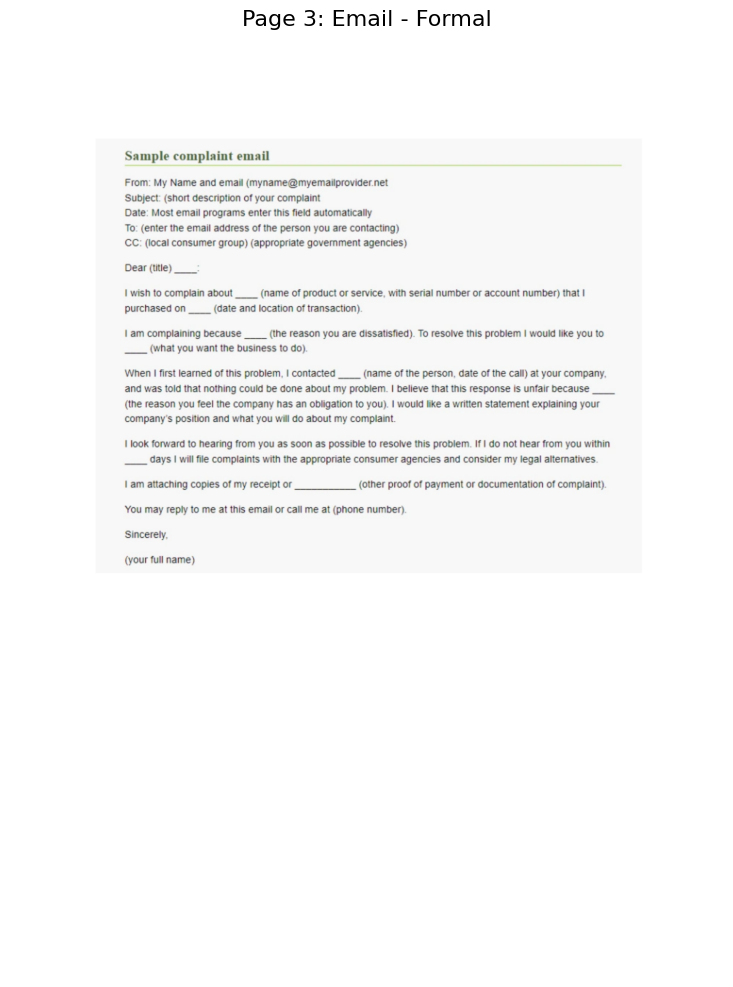

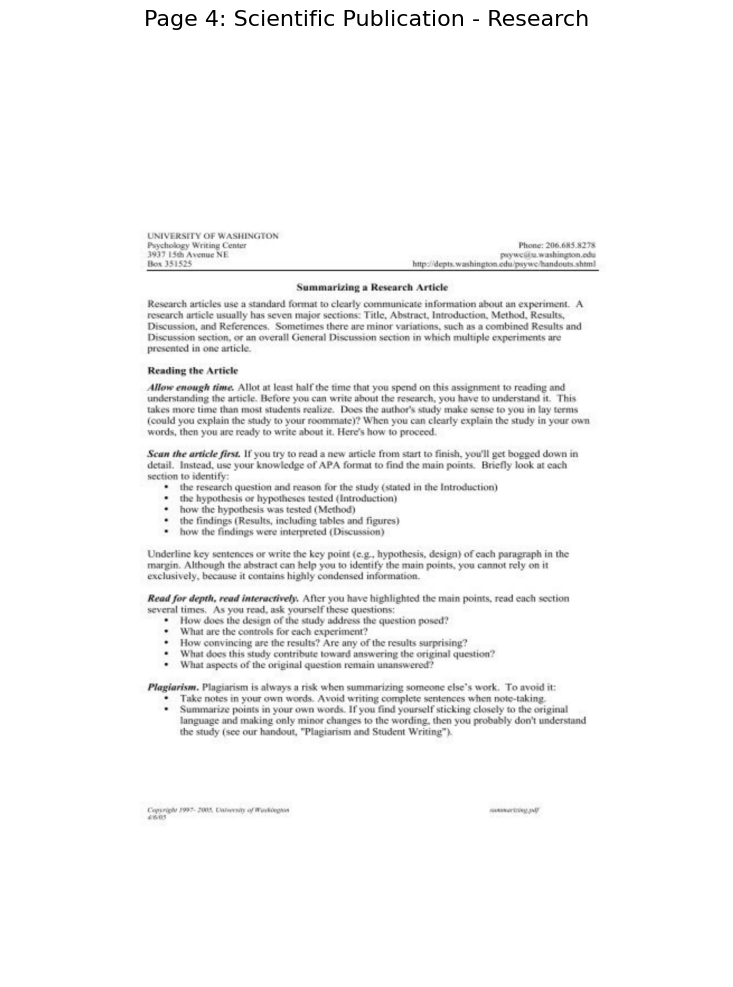

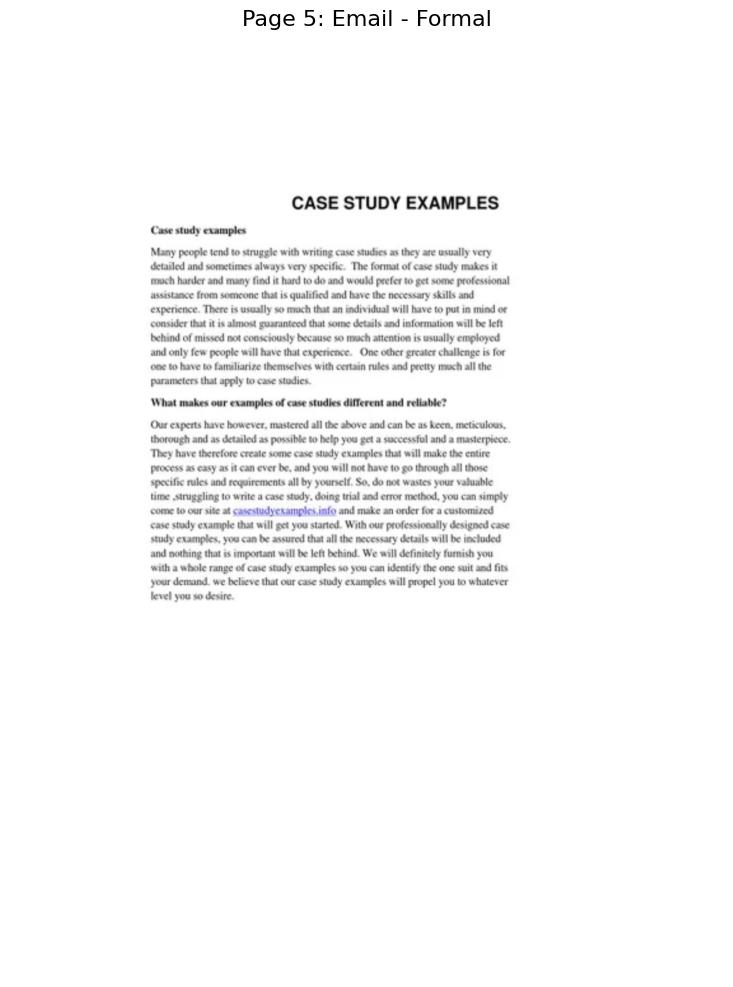

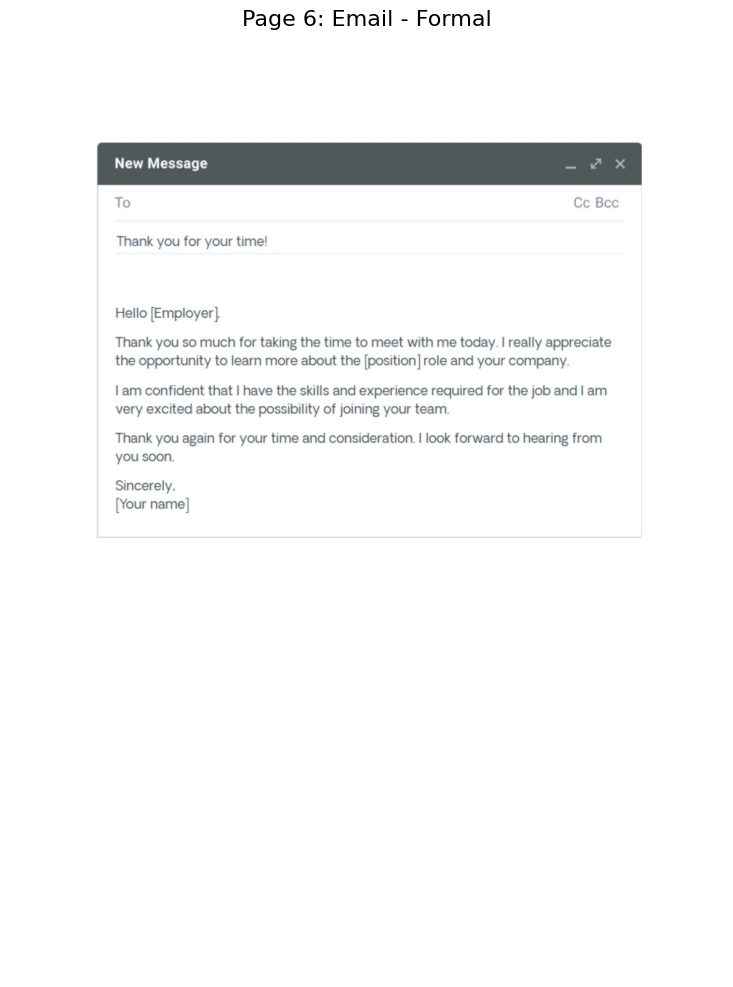

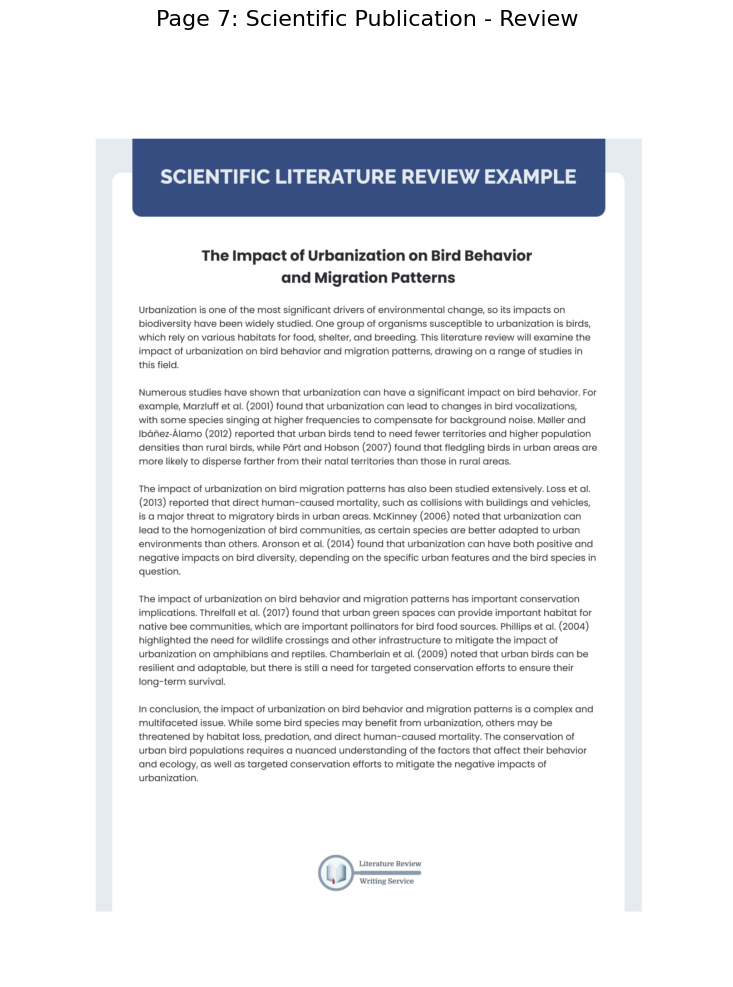

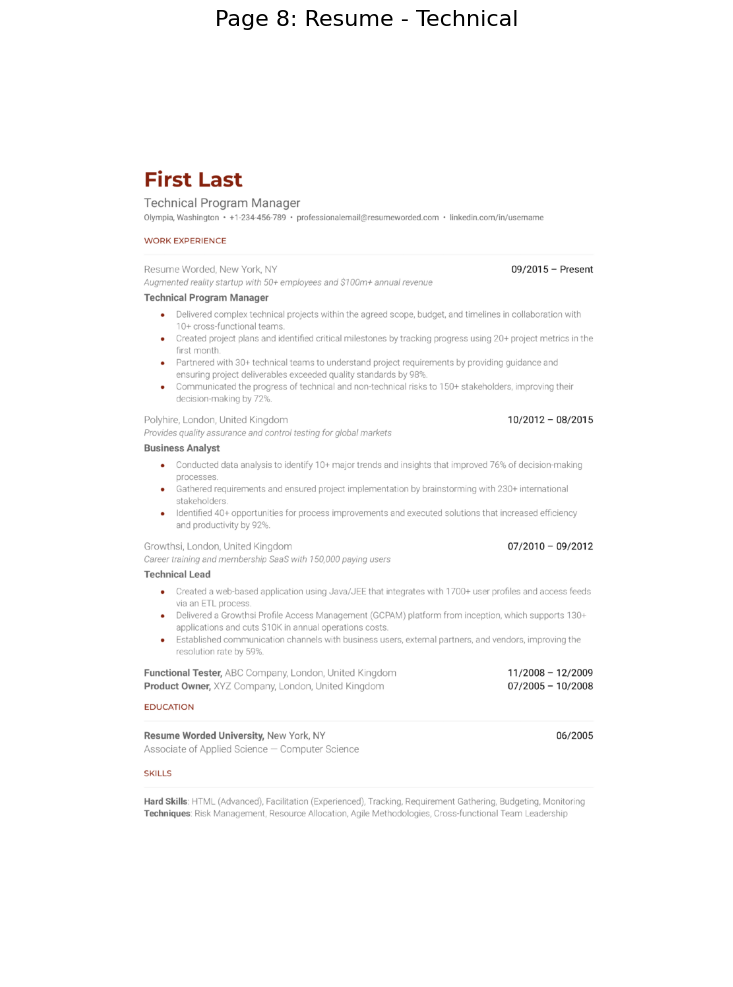

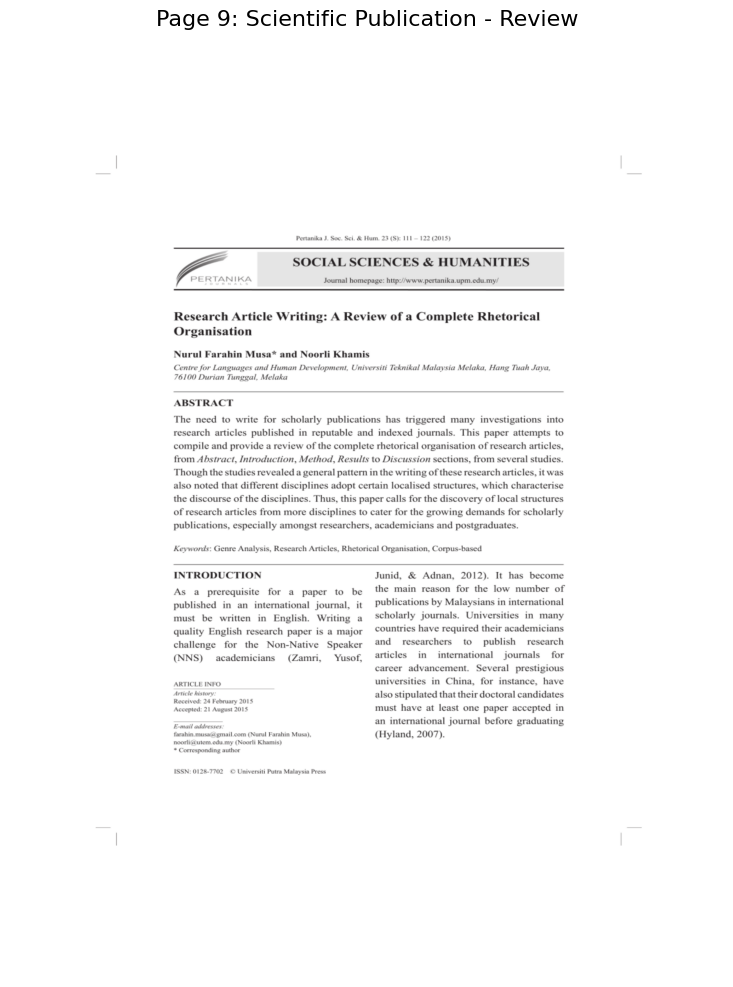

In [ ]:
import pytesseract
from pdf2image import convert_from_path
import openai
import matplotlib.pyplot as plt
from PIL import Image
import os
from google.colab import userdata

# Set your OpenAI API key
openai.api_key = userdata.get('apikey')

# Set path to Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

def convert_pdf_to_images(pdf_path):
    # Convert PDF to images
    images = convert_from_path(pdf_path)
    return images

def extract_text_from_images(images):
    pages_text = []

    for image in images:
        # Use PyTesseract to extract text from each image
        text = pytesseract.image_to_string(image)
        pages_text.append(text)

    return pages_text

def classify_main_category(text):
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "me, Email, Scientific Publication."},
            {"role": "user", "content": text}
        ]
    )Classify the following text as one of: Resu
    main_category = response['choices'][0]['message']['content'].strip()
    return main_category

def classify_email_subcategory(text):
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "Classify the following email text as one of: Formal, Informal."},
            {"role": "user", "content": text}
        ]
    )
    sub_category = response['choices'][0]['message']['content'].strip()
    return sub_category

def classify_resume_subcategory(text):
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "Classify the following resume text as one of: Technical, Non-Technical."},
            {"role": "user", "content": text}
        ]
    )
    sub_category = response['choices'][0]['message']['content'].strip()
    return sub_category

def classify_scientific_publication_subcategory(text):
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "Classify the following scientific publication text as one of: Research, Review, Case Study."},
            {"role": "user", "content": text}
        ]
    )
    sub_category = response['choices'][0]['message']['content'].strip()
    return sub_category

def classify_pdf_pages(pdf_path):
    images = convert_pdf_to_images(pdf_path)
    pages_text = extract_text_from_images(images)
    classifications = []

    for i, text in enumerate(pages_text):
        main_category = classify_main_category(text)

        if main_category == "Email":
            sub_category = classify_email_subcategory(text)
        elif main_category == "Resume":
            sub_category = classify_resume_subcategory(text)
        elif main_category == "Scientific Publication":
            sub_category = classify_scientific_publication_subcategory(text)
        else:
            sub_category = None

        classifications.append((i, images[i], main_category, sub_category))

    return classifications

def display_images_with_classifications(classifications):
    for page_num, image, main_category, sub_category in classifications:
        # Convert PIL image to displayable format
        plt.figure(figsize=(10, 12))
        plt.imshow(image)
        plt.axis('off')

        # Create classification text
        if sub_category:
            classification_text = f"Page {page_num + 1}: {main_category} - {sub_category}"
        else:
            classification_text = f"Page {page_num + 1}: {main_category}"

        plt.title(classification_text, fontsize=16, pad=20)
        plt.show()

# Example Usage
pdf_path = "/content/Untitled document (1) (1).pdf"
page_classifications = classify_pdf_pages(pdf_path)
display_images_with_classifications(page_classifications)


In [ ]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.4).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
pip install openai==0.28